### Required lib and modules

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

### Importing Data files

In [97]:
baner = pd.read_excel('data_source/Baner_cleaned.xlsx')
bavdhan = pd.read_excel('data_source/Bavdhan_cleaned.xlsx')
hinjewadi = pd.read_excel('data_source/Hinjawadi_cleaned.xlsx')
wakad = pd.read_excel('data_source/Wakad_cleaned.xlsx')

## Handling Data Files

In [100]:
baner['locality'] = 'Baner'
bavdhan['locality'] = 'Bavdhan'
hinjewadi['locality'] = 'Hinjewadi'
wakad['locality'] = 'Wakad'

In [101]:
baner_copy = baner.copy()
baner_copy =baner_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

bavdhan_copy = bavdhan.copy()
bavdhan_copy =bavdhan_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

hinjewadi_copy = hinjewadi.copy()
hinjewadi_copy =hinjewadi_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

wakad_copy = wakad.copy()
wakad_copy =wakad_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

### Cleaning the delilvery reviews column

In [102]:
baner_copy.delivery_reviews=baner_copy.delivery_reviews.str.replace('[(,),Delivery,Reviews]','')
bavdhan_copy.delivery_reviews=bavdhan_copy.delivery_reviews.str.replace('[(,),Delivery,Reviews]','')
hinjewadi_copy.delivery_reviews=hinjewadi_copy.delivery_reviews.str.replace('[(,),Delivery,Reviews]','')
wakad_copy.delivery_reviews=wakad_copy.delivery_reviews.str.replace('[(,),Delivery,Reviews]','')

In [103]:
baner_copy

,Name,locality,ratings,off,delivery_reviews,cuisine
0,McDonald's,Baner,4.1,₹50 OFF,9810,"Burger, Fast Food, Beverages"
1,Nawab Asia,Baner,4.1,₹50 OFF,3054,"North Indian, Chinese, Mughlai, Biryani, Desse..."
2,Mithas,Baner,4.3,₹50 OFF,2262,"Mithai, Street Food"
3,Anna Idli,Baner,4.2,₹50 OFF,21.8K,"South Indian, Beverages"
4,Dadu's Sweet Emporio,Baner,4.3,₹50 OFF,4504,"Mithai, Street Food, Ice Cream"
...,...,...,...,...,...,...
1132,WYNKK,Baner,NaN,50% OFF,Not nough,"Bar Food, North Indian, Mughlai, Asian"
1133,Ai Shiwu,Baner,3.6,50% OFF,1146,"Chinese, Asian, Thai"
1134,Mumbaian Pav Bhaji,Baner,3.2,50% OFF,46,Street Food
1135,Shree Datta Bhel,Baner,3.9,50% OFF,15,Street Food


In [114]:
#baner_copy['delivery_reviews'][:].strip()
baner_copy['delivery_reviews'] = baner_copy['delivery_reviews'].apply(lambda x: x.str.strip())


AttributeError: 'str' object has no attribute 'str'

In [115]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    return x
baner_copy['delivery_reviews'] = baner_copy['delivery_reviews'].apply(value_to_float)
bavdhan_copy['delivery_reviews'] = bavdhan_copy['delivery_reviews'].apply(value_to_float)
hinjewadi_copy['delivery_reviews'] = hinjewadi_copy['delivery_reviews'].apply(value_to_float)
wakad_copy['delivery_reviews'] = wakad_copy['delivery_reviews'].apply(value_to_float)

In [116]:
baner_copy

,Name,locality,ratings,off,delivery_reviews,cuisine
0,McDonald's,Baner,4.1,₹50 OFF,9810,"Burger, Fast Food, Beverages"
1,Nawab Asia,Baner,4.1,₹50 OFF,3054,"North Indian, Chinese, Mughlai, Biryani, Desse..."
2,Mithas,Baner,4.3,₹50 OFF,2262,"Mithai, Street Food"
3,Anna Idli,Baner,4.2,₹50 OFF,21800,"South Indian, Beverages"
4,Dadu's Sweet Emporio,Baner,4.3,₹50 OFF,4504,"Mithai, Street Food, Ice Cream"
...,...,...,...,...,...,...
1132,WYNKK,Baner,NaN,50% OFF,Not nough,"Bar Food, North Indian, Mughlai, Asian"
1133,Ai Shiwu,Baner,3.6,50% OFF,1146,"Chinese, Asian, Thai"
1134,Mumbaian Pav Bhaji,Baner,3.2,50% OFF,46,Street Food
1135,Shree Datta Bhel,Baner,3.9,50% OFF,15,Street Food


In [118]:
baner_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1137 non-null   object 
 1   locality          1137 non-null   object 
 2   ratings           851 non-null    float64
 3   off               968 non-null    object 
 4   delivery_reviews  1010 non-null   object 
 5   cuisine           1137 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.4+ KB


In [133]:
## group by

In [135]:
baner_copy['delivery_reviews'] = baner_copy['delivery_reviews'].apply(lambda x: x.rstrip())


AttributeError: 'float' object has no attribute 'rstrip'

## HANDLING BANER DATA SET

In [124]:
baner_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1137 non-null   object 
 1   locality          1137 non-null   object 
 2   ratings           851 non-null    float64
 3   off               968 non-null    object 
 4   delivery_reviews  1010 non-null   object 
 5   cuisine           1137 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.4+ KB


In [150]:
baner_ratings = baner_copy.dropna(subset=['ratings'])

In [151]:
baner_ratings.reset_index(inplace = True, drop = True)

In [168]:
baner_ratings['delivery_reviews'].str.rstrip('  ')

0      9810
1      3054
2      2262
3       NaN
4      4504
       ... 
846      69
847    1146
848      46
849      15
850      87
Name: delivery_reviews, Length: 851, dtype: object

In [169]:
baner_ratings['delivery_reviews']

0      9810  
1      3054  
2      2262  
3       21800
4      4504  
        ...  
846      69  
847    1146  
848      46  
849      15  
850      87  
Name: delivery_reviews, Length: 851, dtype: object

In [166]:
baner_ratings['delivery_reviews'][:].strip('  ')

AttributeError: 'Series' object has no attribute 'strip'

In [ ]:
9810

In [143]:
baner_copy['delivery_reviews'][1].apply(lambda x : x in baner_copy['delivery_reviews'].str.strip())

AttributeError: 'str' object has no attribute 'apply'

In [154]:
baner_ratings

,Name,locality,ratings,off,delivery_reviews,cuisine
0,McDonald's,Baner,4.1,₹50 OFF,9810,"Burger, Fast Food, Beverages"
1,Nawab Asia,Baner,4.1,₹50 OFF,3054,"North Indian, Chinese, Mughlai, Biryani, Desse..."
2,Mithas,Baner,4.3,₹50 OFF,2262,"Mithai, Street Food"
3,Anna Idli,Baner,4.2,₹50 OFF,21800,"South Indian, Beverages"
4,Dadu's Sweet Emporio,Baner,4.3,₹50 OFF,4504,"Mithai, Street Food, Ice Cream"
...,...,...,...,...,...,...
846,Happy Da Punjab,Baner,3.7,50% OFF,69,"North Indian, Chinese, Kebab, Malwani"
847,Ai Shiwu,Baner,3.6,50% OFF,1146,"Chinese, Asian, Thai"
848,Mumbaian Pav Bhaji,Baner,3.2,50% OFF,46,Street Food
849,Shree Datta Bhel,Baner,3.9,50% OFF,15,Street Food


In [78]:
above_four =  baner_ratings.loc[(baner_ratings.ratings > 4.0)]
above_four.reset_index(inplace = True)
above_three = baner_ratings.loc[(baner_ratings.ratings >3.0) & (baner_ratings.ratings < 4.0)]
above_three.reset_index(inplace = True)
above_two = baner_ratings.loc[(baner_ratings.ratings >2.0) & (baner_ratings.ratings < 3.0)]
above_two.reset_index(inplace = True)
above_one = baner_ratings.loc[(baner_ratings.ratings >1.0) & (baner_ratings.ratings < 2.0)]
above_one.reset_index(inplace = True)

In [173]:
baner_ratings.columns=baner_ratings.columns.str.replace('[(,)]','')

In [184]:
baner_ratings['delivery_reviews'].str.rstrip(' ')

0      9810
1      3054
2      2262
3       NaN
4      4504
       ... 
846      69
847    1146
848      46
849      15
850      87
Name: delivery_reviews, Length: 851, dtype: object

In [190]:
baner_ratings['delivery_reviews'].split()

AttributeError: 'Series' object has no attribute 'split'

In [186]:
baner_ratings['delivery_reviews'] = baner_ratings['delivery_reviews'].astype('float')

ValueError: could not convert string to float: 'Not nough  '

In [171]:
baner_ratings

,Name,locality,ratings,off,delivery_reviews,cuisine
0,McDonald's,Baner,4.1,₹50 OFF,9810,"Burger, Fast Food, Beverages"
1,Nawab Asia,Baner,4.1,₹50 OFF,3054,"North Indian, Chinese, Mughlai, Biryani, Desse..."
2,Mithas,Baner,4.3,₹50 OFF,2262,"Mithai, Street Food"
3,Anna Idli,Baner,4.2,₹50 OFF,21800,"South Indian, Beverages"
4,Dadu's Sweet Emporio,Baner,4.3,₹50 OFF,4504,"Mithai, Street Food, Ice Cream"
...,...,...,...,...,...,...
846,Happy Da Punjab,Baner,3.7,50% OFF,69,"North Indian, Chinese, Kebab, Malwani"
847,Ai Shiwu,Baner,3.6,50% OFF,1146,"Chinese, Asian, Thai"
848,Mumbaian Pav Bhaji,Baner,3.2,50% OFF,46,Street Food
849,Shree Datta Bhel,Baner,3.9,50% OFF,15,Street Food


<AxesSubplot:ylabel='Density'>

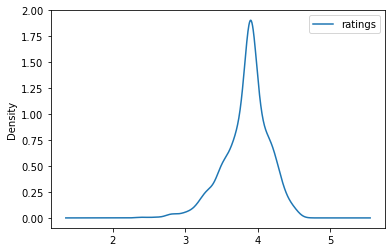

In [172]:
baner_ratings.plot(x="Name", y="ratings", kind="kde")

<Figure size 72000x720 with 0 Axes>

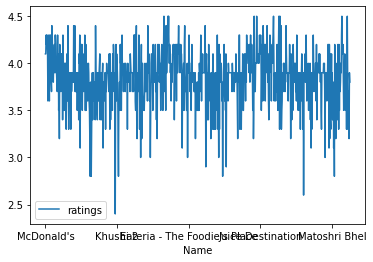

In [83]:
plt.figure(figsize = (1000,10))
baner_ratings.plot(x="Name", y="ratings")
plt.show()

## HANDLING BAVDHAN DATA SET

In [ ]:
bavdhan_copy.info()

## HANDLING HINJEWADI DATA SET

In [ ]:
hinjewadi_copy.info()

## HANDLING WAKAD DATA SET

In [ ]:
wakad_copy.info()

In [ ]:
df = pd.concat([baner_copy, bavdhan_copy, hinjewadi_copy, wakad_copy])

In [ ]:
df

In [ ]:
df.info()

## Ratings null and Not null count

### BANER

In [84]:
print('Null values in Baner data set:', baner_copy['ratings'].isna().sum())

Null values in Baner data set: 286


In [85]:
baner_copy['ratings'].notnull().sum()

851

### BAVDHAN

In [86]:
bavdhan_copy['ratings'].isna().sum()

217

In [87]:
bavdhan_copy['ratings'].notnull().sum()

617

### HINJEWADI

In [88]:
hinjewadi_copy['ratings'].isna().sum()

250

In [89]:
hinjewadi_copy['ratings'].notnull().sum()

710

### WAKAD

In [90]:
wakad_copy['ratings'].isna().sum()

337

In [91]:
wakad_copy['ratings'].notnull().sum()

781

In [93]:
baner_ratings.isna().sum()

Name                 0
locality             0
ratings              0
off                 58
delivery_reviews     0
cuisine              0
dtype: int64

In [95]:
baner_copy.isnull().sum()

Name                  0
locality              0
ratings             286
off                 169
delivery_reviews    127
cuisine               0
dtype: int64